In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (13.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import chardet

# CSV 파일의 인코딩을 자동으로 감지
rawdata = open('서울 화재 출동 현황 (2022).csv', 'rb').read()
result = chardet.detect(rawdata)
encoding = result['encoding']

# CSV 파일 불러오기 (자동으로 감지된 인코딩 사용)
data = pd.read_csv('서울 화재 출동 현황 (2022).csv', encoding=encoding)  # 파일 경로를 적절하게 수정하세요
X1 = data[['현장소방서거리']]  # '현장소방서거리' 열만 선택

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

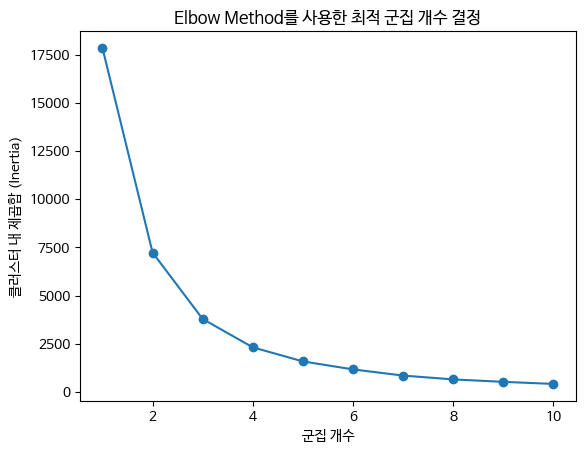

In [ ]:
from sklearn.cluster import KMeans

# 군집 개수 범위 설정
k_values = range(1, 11)  # 예시 범위: 1부터 10까지의 군집 개수

# 각 군집 개수에 대한 K-Means 모델 학습 및 inertia (클러스터 내 제곱합) 계산
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X1)
    inertia_values.append(kmeans.inertia_)

# Elbow Method 그래프 그리기
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('군집 개수')
plt.ylabel('클러스터 내 제곱합 (Inertia)')
plt.title('Elbow Method를 사용한 최적 군집 개수 결정')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


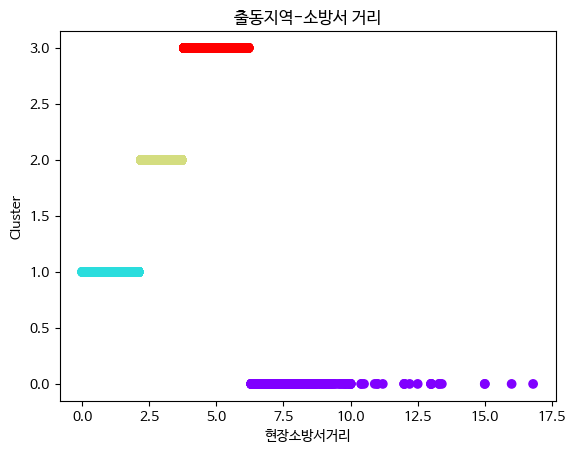

In [ ]:
# K-평균 군집화
k = 4  # 군집 수를 적절하게 선택
kmeans = KMeans(n_clusters=k, random_state=0)
data['군집_소방서거리'] = kmeans.fit_predict(X1)

# 군집화된 데이터 시각화
plt.scatter(X1, data['군집_소방서거리'], c=data['군집_소방서거리'], cmap='rainbow')
plt.xlabel('현장소방서거리')
plt.ylabel('Cluster')
plt.title('출동지역-소방서 거리')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

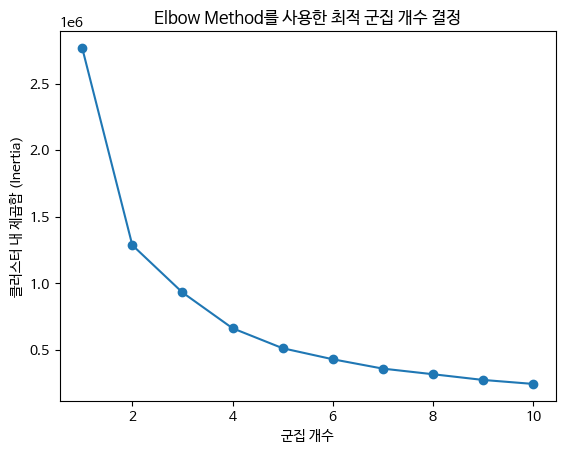

In [ ]:
X2 = data[['시간단위기온', '시간단위습도']]

# 군집 개수 범위 설정
k_values = range(1, 11)  # 예시 범위: 1부터 10까지의 군집 개수

# 각 군집 개수에 대한 K-Means 모델 학습 및 inertia (클러스터 내 제곱합) 계산
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X2)
    inertia_values.append(kmeans.inertia_)

# Elbow Method 그래프 그리기
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('군집 개수')
plt.ylabel('클러스터 내 제곱합 (Inertia)')
plt.title('Elbow Method를 사용한 최적 군집 개수 결정')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


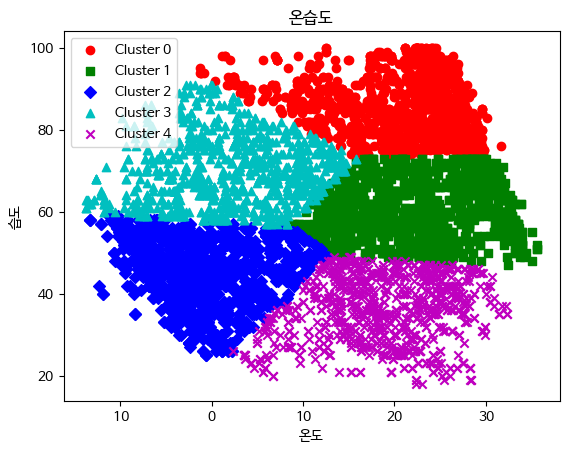

In [ ]:
# K-평균 군집화
k = 5  # 군집 수를 적절하게 선택
kmeans = KMeans(n_clusters=k, random_state=0)
data['군집_온습도'] = kmeans.fit_predict(X2)


markers = ['o', 's', 'D', '^', 'x']  # 다양한 마커 모양
colors = ['r', 'g', 'b', 'c', 'm']  # 다양한 색상

for i in range(k):
    cluster_data = data[data['군집_온습도'] == i]
    plt.scatter(cluster_data['시간단위기온'], cluster_data['시간단위습도'], marker=markers[i], c=colors[i], label=f'Cluster {i}')

plt.xlabel('온도')
plt.ylabel('습도')
plt.title('온습도')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

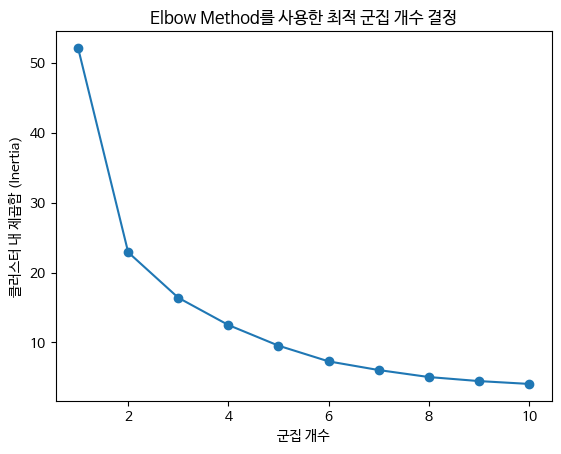

In [ ]:
X3 = data[['경도', '위도']]

# 군집 개수 범위 설정
k_values = range(1, 11)  # 예시 범위: 1부터 10까지의 군집 개수

# 각 군집 개수에 대한 K-Means 모델 학습 및 inertia (클러스터 내 제곱합) 계산
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X3)
    inertia_values.append(kmeans.inertia_)

# Elbow Method 그래프 그리기
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('군집 개수')
plt.ylabel('클러스터 내 제곱합 (Inertia)')
plt.title('Elbow Method를 사용한 최적 군집 개수 결정')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


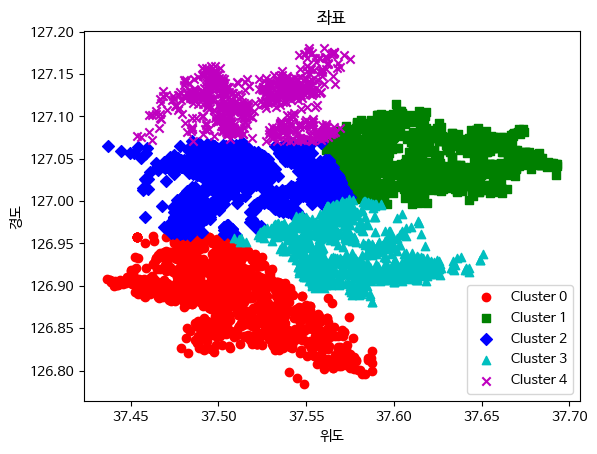

In [ ]:
# K-평균 군집화
k = 5  # 군집 수를 적절하게 선택
kmeans = KMeans(n_clusters=k, random_state=0)
data['군집_위경도'] = kmeans.fit_predict(X3)


markers = ['o', 's', 'D', '^', 'x']  # 다양한 마커 모양
colors = ['r', 'g', 'b', 'c', 'm']  # 다양한 색상

for i in range(k):
    cluster_data = data[data['군집_위경도'] == i]
    plt.scatter(cluster_data['위도'], cluster_data['경도'], marker=markers[i], c=colors[i], label=f'Cluster {i}')

plt.xlabel('위도')
plt.ylabel('경도')
plt.title('좌표')
plt.legend()
plt.show()


<ipython-input-57-1d1ad05b2dc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4["읍면동명"] = X4["읍면동명"].astype("category")
<ipython-input-57-1d1ad05b2dc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4["읍면동명"] = X4["읍면동명"].cat.codes
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

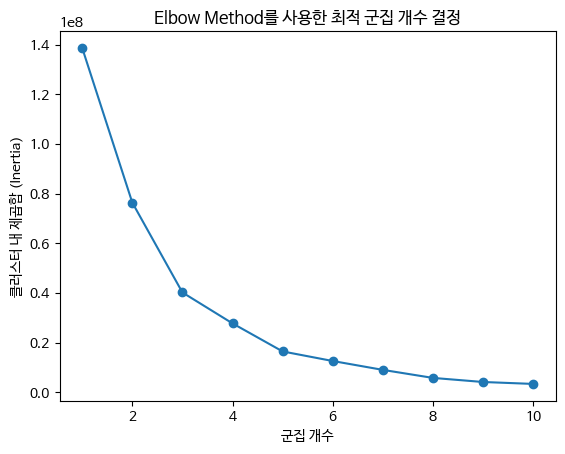

In [ ]:
X4 = data[['읍면동명']]
X4["읍면동명"] = X4["읍면동명"].astype("category")
X4["읍면동명"] = X4["읍면동명"].cat.codes

# 군집 개수 범위 설정
k_values = range(1, 11)  # 예시 범위: 1부터 10까지의 군집 개수

# 각 군집 개수에 대한 K-Means 모델 학습 및 inertia (클러스터 내 제곱합) 계산
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Elbow Method 그래프 그리기
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('군집 개수')
plt.ylabel('클러스터 내 제곱합 (Inertia)')
plt.title('Elbow Method를 사용한 최적 군집 개수 결정')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


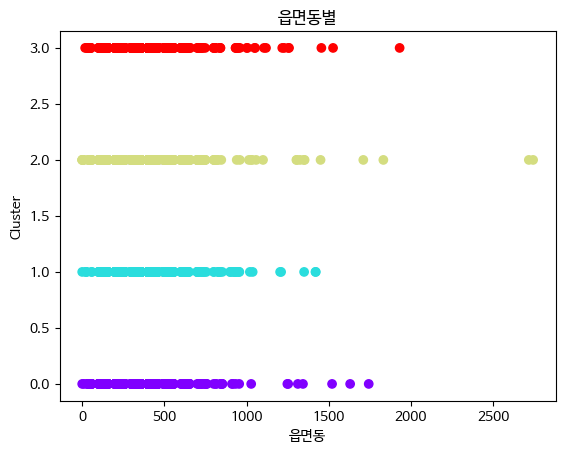

In [ ]:
# K-평균 군집화
k = 4  # 군집 수를 적절하게 선택
kmeans = KMeans(n_clusters=k, random_state=0)
data['군집_읍면동'] = kmeans.fit_predict(X4)

# 군집화된 데이터 시각화
plt.scatter(X, data['군집_읍면동'], c=data['군집_읍면동'], cmap='rainbow')
plt.xlabel('읍면동')
plt.ylabel('Cluster')
plt.title('읍면동별')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

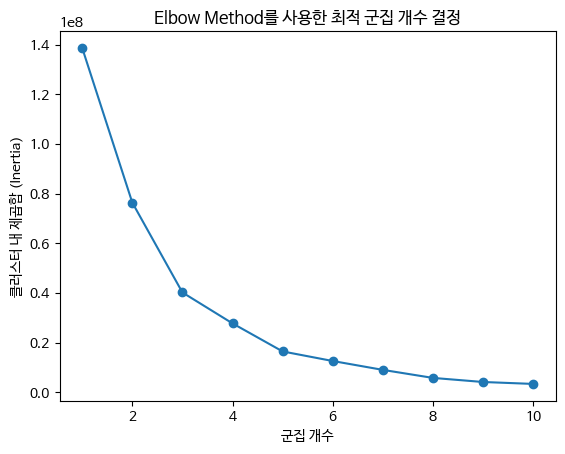

In [ ]:
X5 = data[['출동소요시간']]
# 군집 개수 범위 설정
k_values = range(1, 11)  # 예시 범위: 1부터 10까지의 군집 개수

# 각 군집 개수에 대한 K-Means 모델 학습 및 inertia (클러스터 내 제곱합) 계산
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X5)
    inertia_values.append(kmeans.inertia_)

# Elbow Method 그래프 그리기
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('군집 개수')
plt.ylabel('클러스터 내 제곱합 (Inertia)')
plt.title('Elbow Method를 사용한 최적 군집 개수 결정')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


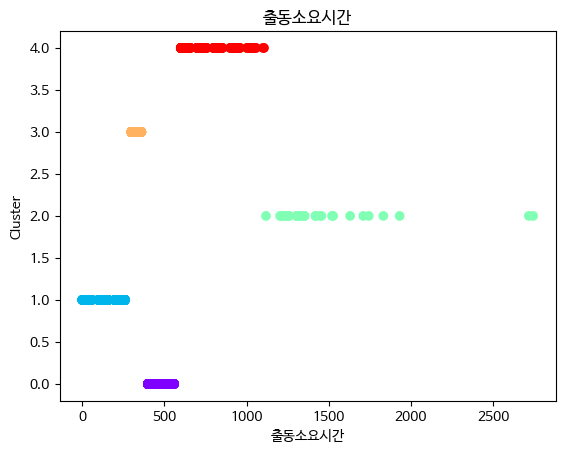

In [ ]:
# K-평균 군집화
k = 5  # 군집 수를 적절하게 선택
kmeans = KMeans(n_clusters=k, random_state=0)
data['군집_출동소요시간'] = kmeans.fit_predict(X5)

# 군집화된 데이터 시각화
plt.scatter(X, data['군집_출동소요시간'], c=data['군집_출동소요시간'], cmap='rainbow')
plt.xlabel('출동소요시간')
plt.ylabel('Cluster')
plt.title('출동소요시간')
plt.show()

# 결과를 파일로 저장
data.to_csv('군집.csv', index=False)  # 파일 이름을 적절하게 수정하세요